# Age stratification

Summer provides a special age stratification class ([AgeStratification](http://summerepi.com/api/stratification.html#summer.stratification.AgeStratification)) that automatically adds ageing flows to the model. See the linked documentation for more details on the flows.

`AgeStratification` is used similarly to the more general-purpose `Stratification` class, except it makes some assumptions of the meaning of the strata in order to implement ageing flows.

**Important caveat**: The AgeStratification assumes that your time unit is years.

Let's start by creating a vanilla SIR model. You can see that there are no flows by default:

In [1]:
from summer import CompartmentalModel, AgeStratification

model = CompartmentalModel(
    times=[1990, 2010],
    compartments=["S", "I", "R"],
    infectious_compartments=["I"],
    timestep=0.1,
)
model.set_initial_population(distribution={"S": 900, "I": 100, "R": 10})


model._flows

[]

Next, lets add an age stratification with the following age strata:

- 0: 0-19 year olds
- 20: 20-39 year olds
- 40: 40-59 year olds
- 60: ages 60+

Now you can see that 9 ageing flows have been added:

In [2]:
strata = [0, 20, 40, 60]
strat = AgeStratification(name="age", strata=strata, compartments=['S', 'I', 'R'])
strat.set_population_split({'0': 0.4, '20': 0.3, '40': 0.2, '60': 0.1})
model.stratify_with(strat)
model._flows

[<SojournFlow 'ageing_SXage_0_to_SXage_20' from SXage_0 to SXage_20>,
 <SojournFlow 'ageing_IXage_0_to_IXage_20' from IXage_0 to IXage_20>,
 <SojournFlow 'ageing_RXage_0_to_RXage_20' from RXage_0 to RXage_20>,
 <SojournFlow 'ageing_SXage_20_to_SXage_40' from SXage_20 to SXage_40>,
 <SojournFlow 'ageing_IXage_20_to_IXage_40' from IXage_20 to IXage_40>,
 <SojournFlow 'ageing_RXage_20_to_RXage_40' from RXage_20 to RXage_40>,
 <SojournFlow 'ageing_SXage_40_to_SXage_60' from SXage_40 to SXage_60>,
 <SojournFlow 'ageing_IXage_40_to_IXage_60' from IXage_40 to IXage_60>,
 <SojournFlow 'ageing_RXage_40_to_RXage_60' from RXage_40 to RXage_60>]

The rate of ageing is the reciprocal of the width of the age bracket: that is - people in the 0-19 age bracket will leave the bracket at a rate of 5% per year. People in the oldest age bracket will not leave their age bracket through an ageing process (although other flows may cause them to leave the model or transition between compartments within their bracket).

Let's visualize the results.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def plot_results(model, compartment_names):
    # Plot the results
    fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=120)
    for i in range(model.outputs.shape[1]):
        if model.compartments[i].name in compartment_names:
            ax.plot(model.times, model.outputs.T[i])

    ax.set_title("SIR Model Outputs")
    ax.set_xlabel("Year")
    ax.set_ylabel("Compartment size")
    start, end = ax.get_xlim()
    ax.xaxis.set_ticks(np.arange(start + 1, end, 5))
    ax.legend([str(c) for c in model.compartments if c.name in compartment_names], loc='upper right')
    plt.show()

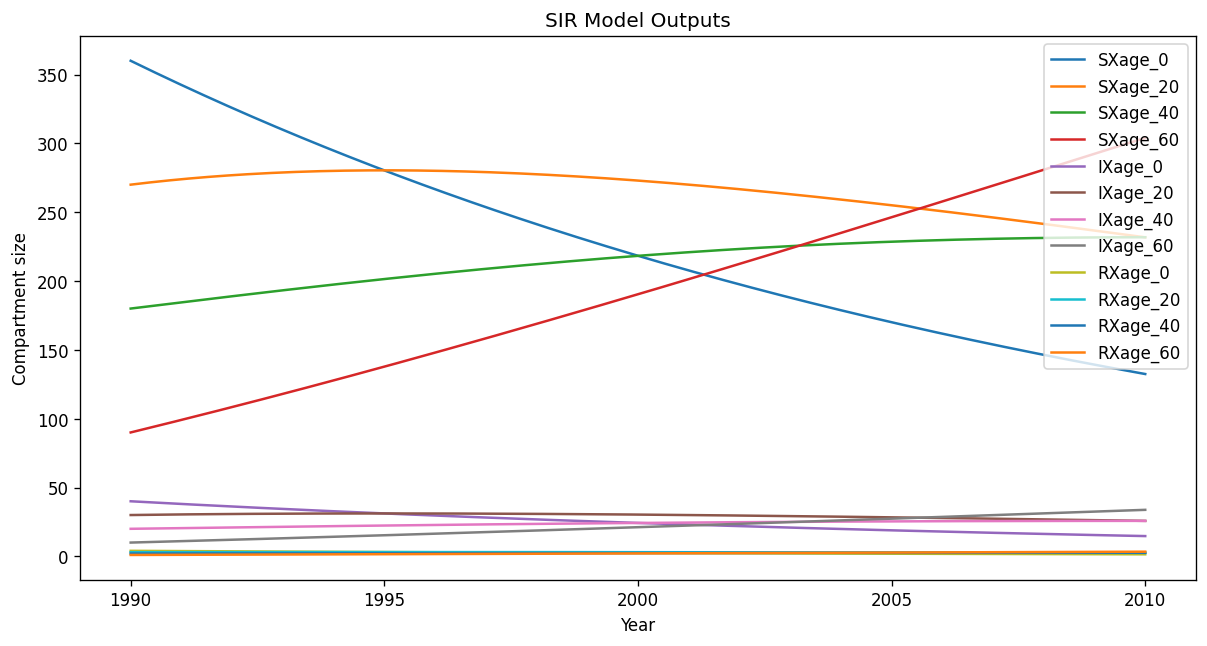

In [4]:
model.run()
plot_results(model, ['S', 'I', 'R'])

As you can see above, these ageing flows add new dynamics to the model. They are easier to visualise if we consider the age strata for the S, I and R compartments separately:

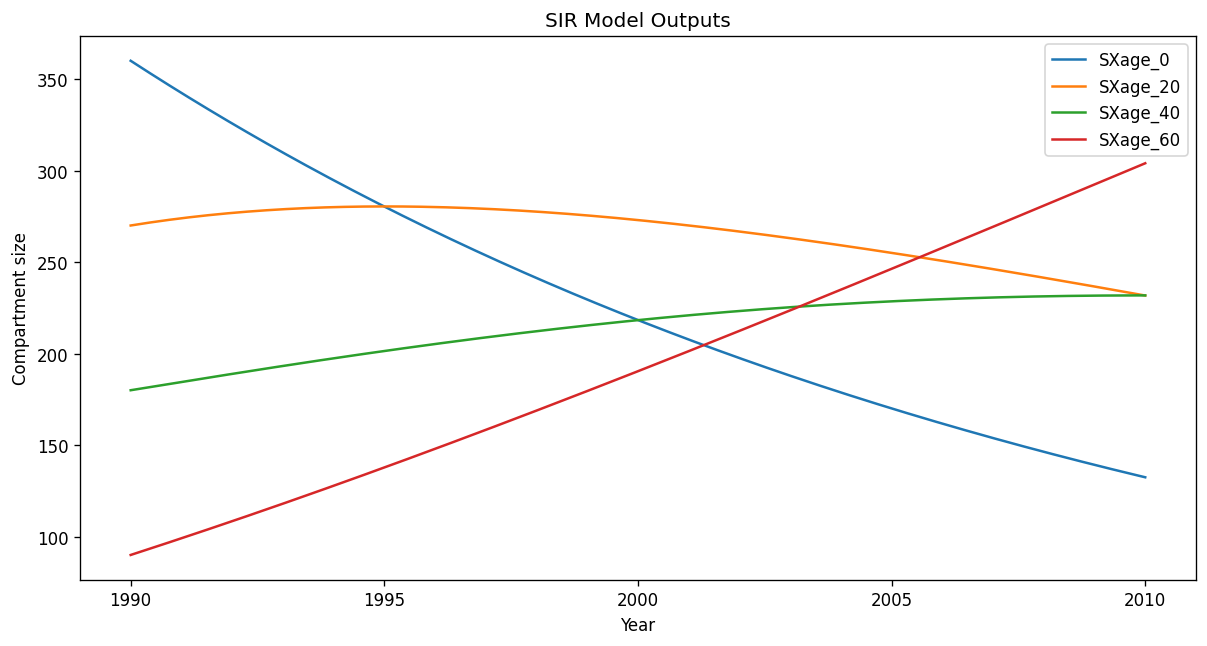

In [5]:
plot_results(model, ['S'])

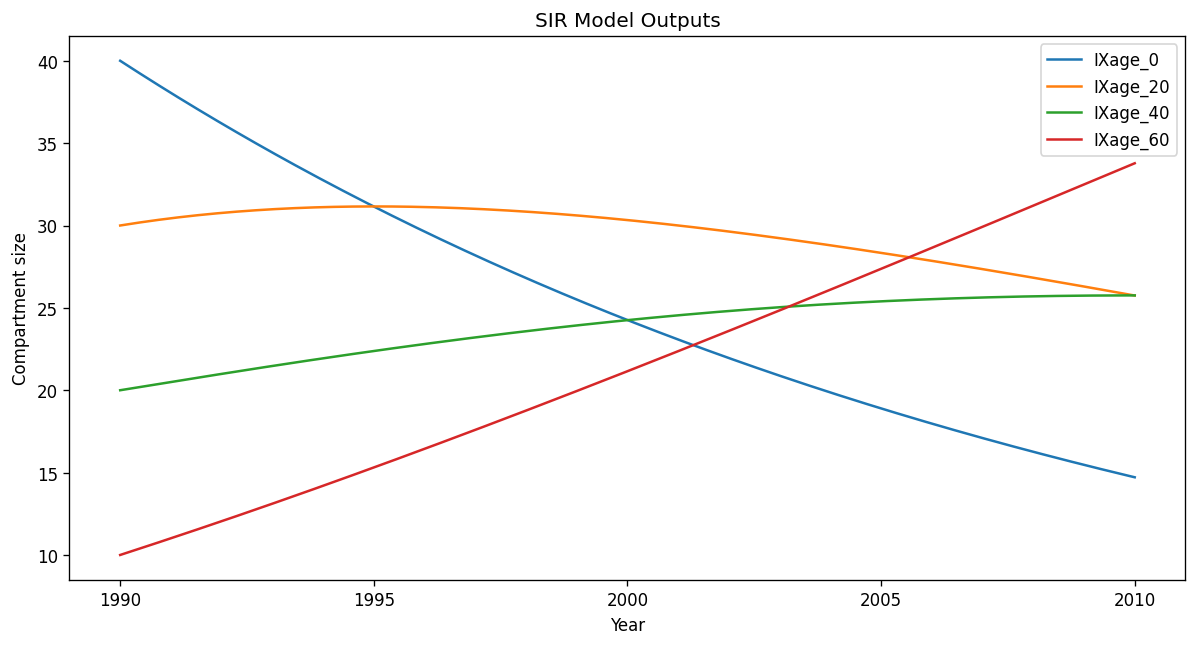

In [6]:
plot_results(model, ['I'])

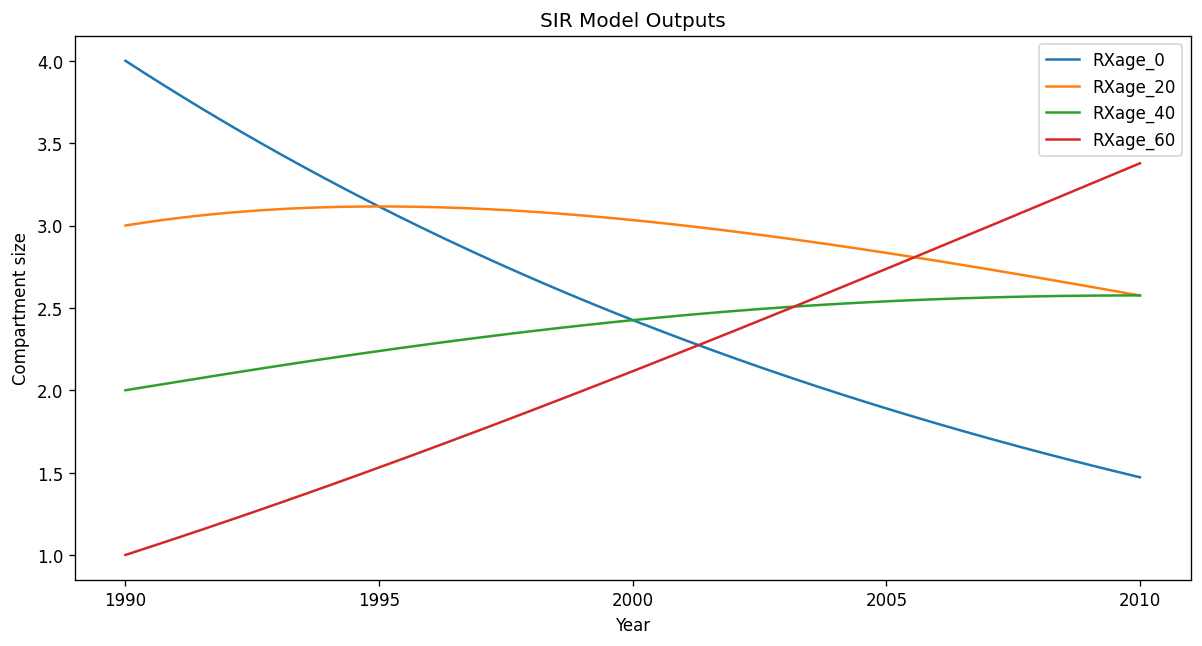

In [7]:
plot_results(model, ['R'])

## Summary

Now you know how to use an AgeStratification to automatically generate ageing flows. See the [API reference](http://summerepi.com/api/stratification.html#summer.stratification.AgeStratification) for more details.